In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 1.理解预测目标，根据乘客信息，预测乘客幸存的可能性
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
PassengerId=test['PassengerId']
all_data = pd.concat([train, test], ignore_index = True)
# 2.分析数据：包括数据清洗(特征值为null),数据分析(每个特征和幸存的关系)
# 查看数据
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# 首先通过info()方法查看数据特征为null的情况
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


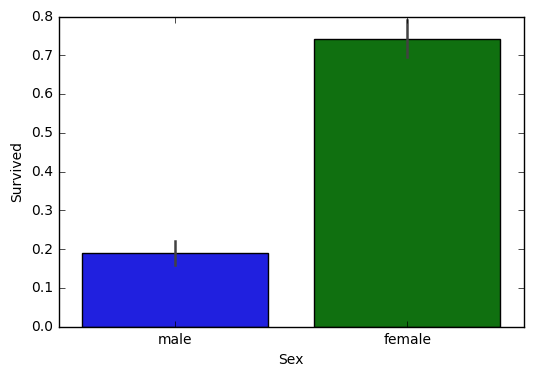

In [29]:
# 1.Sex Feature：性别特征：女性幸存几率大于男性
sns.barplot(x="Sex", y="Survived", data=train)
plt.show()

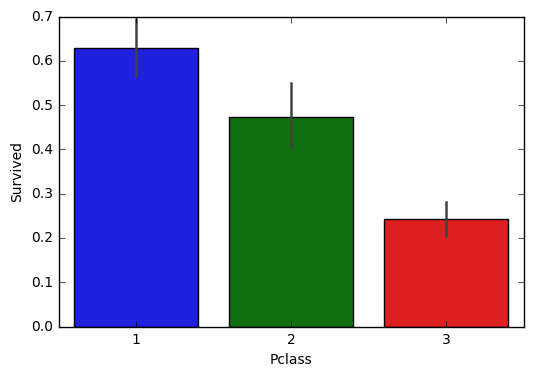

In [31]:
# 2.Pclass Feature：客舱等级特征：等级越高幸存几率越大
sns.barplot(x="Pclass", y="Survived", data=train)
plt.show()

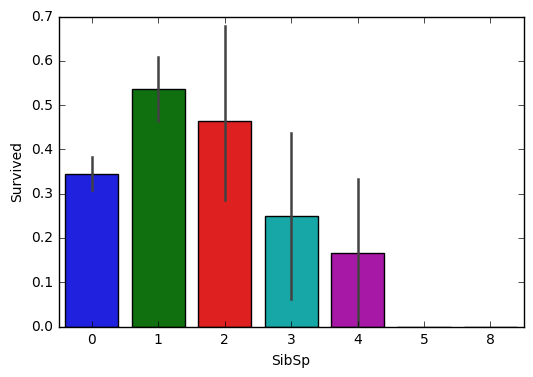

In [33]:
# 3.SibSp Feature：配偶及兄弟姐妹数适中的乘客幸存率更高
sns.barplot(x="SibSp", y="Survived", data=train)
plt.show()

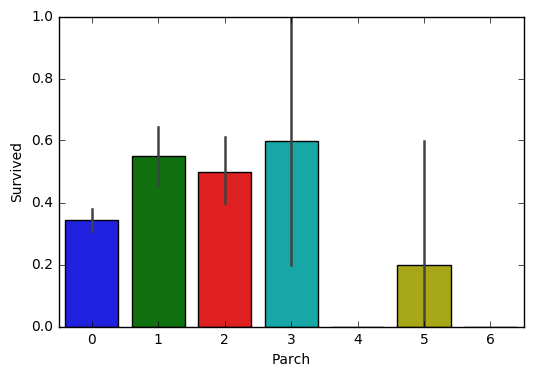

In [35]:
# Parch Feature：父母与子女数适中的乘客幸存率更高
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

In [49]:
# Age Feature：
# sns.distplot(train['Age'].dropna())
# plt.show()
train['Age'].dropna().value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
27.00    18
35.00    18
26.00    18
32.00    18
31.00    17
16.00    17
23.00    15
20.00    15
34.00    15
33.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
48.00     9
         ..
0.75      2
45.50     2
64.00     2
30.50     2
0.83      2
32.50     2
40.50     2
71.00     2
28.50     2
63.00     2
59.00     2
57.00     2
55.00     2
70.00     2
55.50     1
24.50     1
34.50     1
0.92      1
36.50     1
0.42      1
23.50     1
12.00     1
20.50     1
14.50     1
80.00     1
74.00     1
70.50     1
66.00     1
53.00     1
0.67      1
Name: Age, dtype: int64